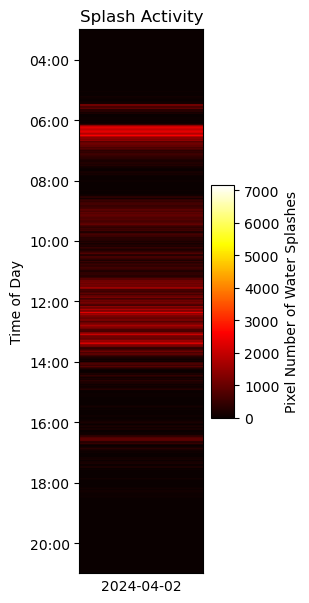

In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

# 讀取JSON數據
def read_json(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    return data

# 處理數據
def process_data(data):
    times = []
    pixel_numbers = []
    for item in data:
        # 解析時間，假設時間格式是 "YYYY-MM-DD-HH-MM-SS.png"
        time = datetime.strptime(item['time'], '%Y-%m-%d-%H-%M-%S.png')
        times.append(time)
        pixel_numbers.append(item['pixel_number'])
    return times, pixel_numbers

# 繪製熱圖
def plot_heatmap(times, pixel_numbers, json_date):
    # 將時間轉換為matplotlib可理解的格式
    times = mdates.date2num(times)
    
    # 轉換pixel_numbers為二維陣列，方便使用imshow
    pixel_array = np.array(pixel_numbers).reshape(-1, 1)

    fig, ax = plt.subplots(figsize=(2, 8))  # 寬度較窄，高度較長
    img = ax.imshow(pixel_array, aspect='auto', cmap='hot', extent=[0, 1, times.max(), times.min()])
    ax.set_xticks([])
    # 設定y軸的日期格式
    ax.yaxis_date()
    date_format = mdates.DateFormatter('%H:%M')
    ax.yaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()  # 自動旋轉日期標記
    
    # 添加Colorbar
    cbar = plt.colorbar(img, ax=ax, aspect=10)
    cbar.set_label('Pixel Number of Water Splashes')

    # 使用JSON檔案的日期作為標題
    plt.title(f'Splash Activity')
    plt.xlabel(json_date)  # 將日期顯示在X軸位置
    plt.ylabel('Time of Day')
    plt.show()

# 假設你的JSON檔案路徑
json_data = read_json('C:/Users/user/Desktop/NAS_data/鱸魚/高雄黃明和/frames-20240402/pixel_counts.json')
times, pixel_numbers = process_data(json_data)

# 從任一時間點提取日期來作為標題（假定所有時間點都在同一天）
json_date = times[0].strftime('%Y-%m-%d')
plot_heatmap(times, pixel_numbers, json_date)


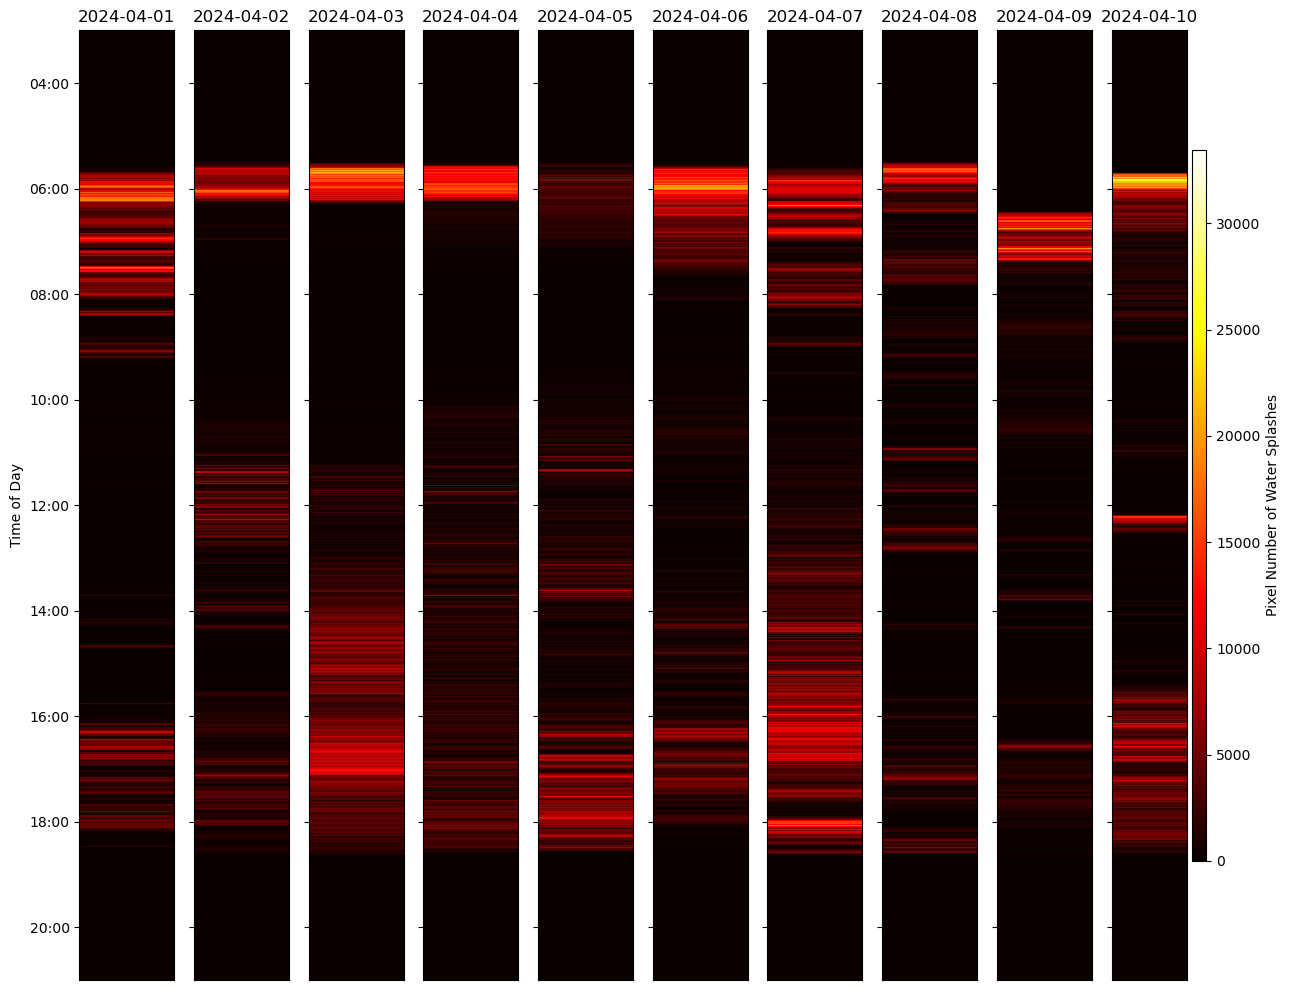

In [102]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
import tkinter as tk
from tkinter import filedialog

def select_folder():
    root = tk.Tk()
    root.withdraw()
    parent_folder = filedialog.askdirectory(title="選擇資料夾")
    return parent_folder

def read_json(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    return data

# 處理數據
def process_data(data):
    times = []
    pixel_numbers = []
    for item in data:
        # 解析時間，假設時間格式是 "YYYY-MM-DD-HH-MM-SS.png"
        time = datetime.strptime(item['time'], '%Y-%m-%d-%H-%M-%S.png')
        times.append(time)
        pixel_numbers.append(item['pixel_number'])
    return times, pixel_numbers

# 畫熱圖
def plot_heatmap(ax, times, pixel_numbers, json_date, is_first, is_last):
    # 將時間轉換為matplotlib可理解的格式
    times = mdates.date2num(times)
    
    # 轉換pixel_numbers為二維陣列，方便使用imshow
    pixel_array = np.array(pixel_numbers).reshape(-1, 1)

    img = ax.imshow(pixel_array, aspect='auto', cmap='hot', extent=[0, 1, times.max(), times.min()])
    ax.set_xticks([])
    # 設定y軸的日期格式
    ax.yaxis_date()
    date_format = mdates.DateFormatter('%H:%M')
    ax.yaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()
    
    ax.set_title(json_date)

    if is_first:
        ax.set_ylabel('Time of Day')
    elif is_last:
        ax.set_yticklabels([])
        cbar = plt.colorbar(img, ax=ax, aspect=50)
        cbar.set_label('Pixel Number of Water Splashes')        
    else:
        ax.set_yticklabels([])


# 處理一個資料夾內的所有JSON檔案
def process_folder(folder_path):
    json_files = [f for f in sorted(os.listdir(folder_path)) if f.endswith('.json')]
    json_files = sorted(json_files, key=lambda x: datetime.strptime(x.replace('pixel_counts_', '').replace('.json', ''), '%Y%m%d'))
    
    fig, axes = plt.subplots(1, len(json_files), figsize=(13, 10))

    for ax, filename in zip(axes, json_files):
        json_path = os.path.join(folder_path, filename)
        json_data = read_json(json_path)
        times, pixel_numbers = process_data(json_data)
        json_date = times[0].strftime('%Y-%m-%d')
        plot_heatmap(ax, times, pixel_numbers, json_date, ax is axes[0], ax is axes[-1])

    plt.tight_layout()
    plt.show()

#folder_path = select_folder()
process_folder("C:/Users/user/Desktop/NAS_data/鱸魚/高雄黃明和/jsons")


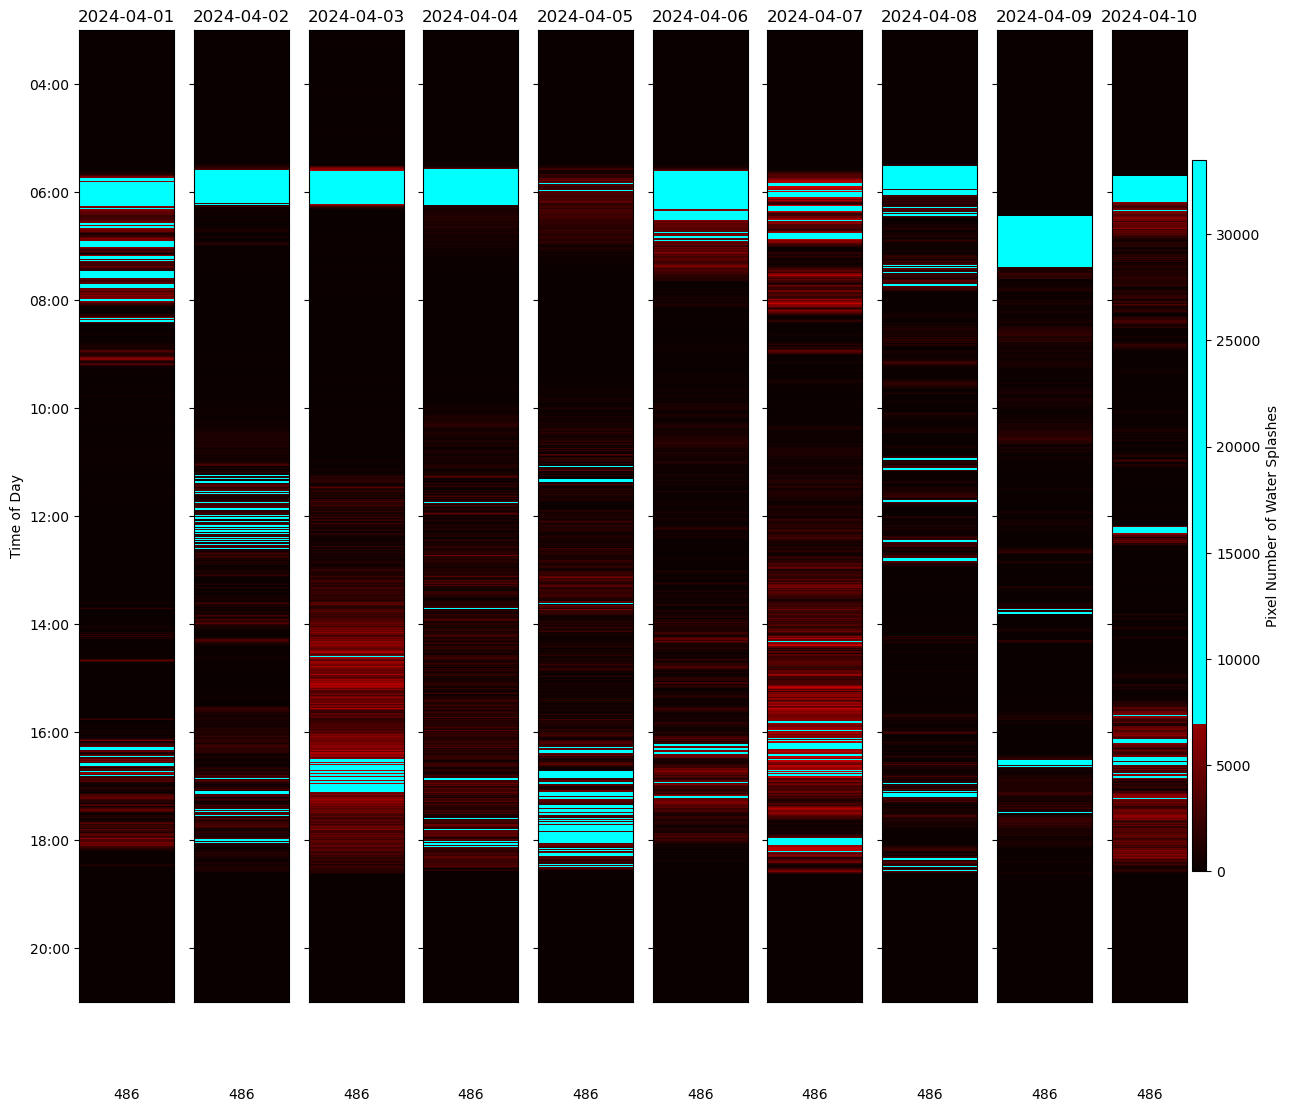

In [104]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, time
import matplotlib.colors as mcolors
import os
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
import tkinter as tk
from tkinter import filedialog

def select_folder():
    root = tk.Tk()
    root.withdraw()
    parent_folder = filedialog.askdirectory(title="選擇資料夾")
    return parent_folder

def read_json(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    return data

# 處理數據
def process_data(data):
    times = []
    pixel_numbers = []
    for item in data:
        # 解析時間，假設時間格式是 "YYYY-MM-DD-HH-MM-SS.png"
        time = datetime.strptime(item['time'], '%Y-%m-%d-%H-%M-%S.png')
        times.append(time)
        pixel_numbers.append(item['pixel_number'])
    return times, pixel_numbers

# 畫熱圖並依照時間區間內的平均pixel_counts變換顏色
def plot_heatmap_new(ax, times, pixel_numbers, json_date, is_first):
    times = mdates.date2num(times)

    # 預投餌階段
    start_time = time(5, 0)
    end_time = time(7, 0)

    # 找出預投餌階段的 pixel_numbers
    indices = [i for i, t in enumerate(times) if start_time <= datetime.fromordinal(int(t)).time() <= end_time]
    if indices:
        mean_value = np.mean([pixel_numbers[i] for i in indices])
    else:
        mean_value = 0

    # 轉換pixel_numbers為二維陣列，方便使用imshow
    pixel_array = np.array(pixel_numbers).reshape(-1, 1)

    # 自定義顏色映射及範圍
    norm = mcolors.Normalize(vmin=np.min(pixel_numbers), vmax=np.max(pixel_numbers))
    cmap = plt.get_cmap('hot')  # 獲取原始的colormap

    # 創建一個新的colormap，讓高於特定數值的pixel_numbers用不同的顏色表示
    threshold = mean_value+10000  # 閾值
    print(threshold)
    colors = cmap(np.linspace(0, 1, 256))
    high_pixel_index = int(256 * (threshold - np.min(pixel_numbers)) / (np.max(pixel_numbers) - np.min(pixel_numbers)))
    colors[high_pixel_index:, :3] = np.array([0, 1, 1])
    new_cmap = mcolors.LinearSegmentedColormap.from_list('custom_hot', colors)

    img = ax.imshow(pixel_array, aspect='auto', cmap=new_cmap, norm=norm, extent=[0, 1, times.max(), times.min()])
    ax.set_xticks([])
    # 設定y軸的日期格式
    ax.yaxis_date()
    date_format = mdates.DateFormatter('%H:%M')
    ax.yaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()

    ax.set_title(json_date)
    if not is_first:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('Time of Day')

def plot_heatmap_new_new(ax, times, pixel_numbers, json_date, is_first, is_last):
    # 將時間轉換為matplotlib可理解的格式
    times = mdates.date2num(times)

    # 轉換pixel_numbers為二維陣列，方便使用imshow
    pixel_array = np.array(pixel_numbers).reshape(-1, 1)

    # 計算中位數和第三四分位數
    median_value = np.median(pixel_numbers)
    third_quartile_value = np.percentile(pixel_numbers, 92.5)

    # 可以選擇使用中位數或第三四分位數作為閾值
    threshold = third_quartile_value  # 或者使用 median_value

    # 自定義顏色映射及範圍
    norm = mcolors.Normalize(vmin=np.min(pixel_numbers), vmax=np.max(pixel_numbers))
    cmap = plt.get_cmap('hot')  # 獲取原始的colormap

    # 創建一個新的colormap，讓高於特定數值的pixel_numbers用不同的顏色表示
    colors = cmap(np.linspace(0, 1, 256))
    high_pixel_index = int(256 * (threshold - np.min(pixel_numbers)) / (np.max(pixel_numbers) - np.min(pixel_numbers)))
    colors[high_pixel_index:, :3] = np.array([0, 1, 1])  # 紅色
    new_cmap = mcolors.LinearSegmentedColormap.from_list('custom_hot', colors)

    img = ax.imshow(pixel_array, aspect='auto', cmap=new_cmap, norm=norm, extent=[0, 1, times.max(), times.min()])
    ax.set_xticks([])
    # 設定y軸的日期格式
    ax.yaxis_date()
    date_format = mdates.DateFormatter('%H:%M')
    ax.yaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()

    ax.set_title(json_date)
    if is_first:
        ax.set_ylabel('Time of Day')
    elif is_last:
        ax.set_yticklabels([])
        cbar = plt.colorbar(img, ax=ax, aspect=50)
        cbar.set_label('Pixel Number of Water Splashes')        
    else:
        ax.set_yticklabels([])
    high_value_count = np.sum(pixel_numbers > threshold)
    ax.text(0.5, -0.1, f"{high_value_count}", transform=ax.transAxes, ha='center', fontsize=10)

def process_folder(folder_path):
    json_files = [f for f in sorted(os.listdir(folder_path)) if f.endswith('.json')]
    json_files = sorted(json_files, key=lambda x: datetime.strptime(x.replace('pixel_counts_', '').replace('.json', ''), '%Y%m%d'))
    
    fig, axes = plt.subplots(1, len(json_files), figsize=(13, 11))

    for ax, filename in zip(axes, json_files):
        json_path = os.path.join(folder_path, filename)
        json_data = read_json(json_path)
        times, pixel_numbers = process_data(json_data)
        json_date = times[0].strftime('%Y-%m-%d')
        #plot_heatmap_new(ax, times, pixel_numbers, json_date, ax is axes[0])
        plot_heatmap_new_new(ax, times, pixel_numbers, json_date, ax is axes[0], ax is axes[-1])
    plt.tight_layout()
    plt.show()

#folder_path = select_folder()
process_folder("C:/Users/user/Desktop/NAS_data/鱸魚/高雄黃明和/jsons")

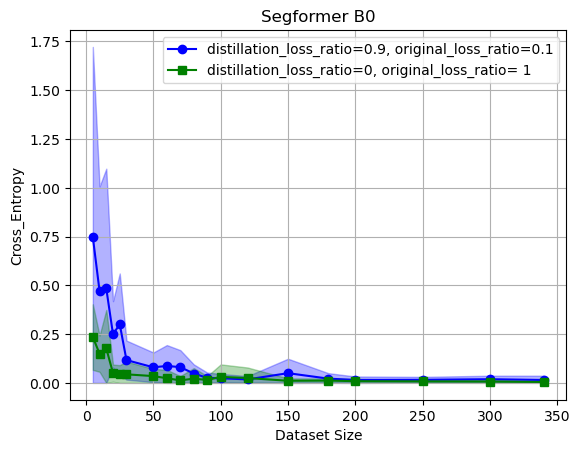

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# 假設的數據
train_sizes = train_size =  [5, 10, 15, 20, 25, 30, 50, 60, 70, 80, 90, 100, 120, 150, 180, 200, 250, 300, 340]
teacher_ratio = 0.9

mean_val_losses_90 = [0.748, 0.471, 0.484, 0.249, 0.301, 0.117, 0.08, 0.087, 0.081, 0.048, 0.026, 0.024, 0.018, 0.05, 0.022, 0.015, 0.016, 0.019, 0.015]
std_val_losses_90 = [0.974, 0.536, 0.614, 0.17, 0.26, 0.1, 0.076, 0.107, 0.087, 0.047, 0.027, 0.022, 0.017, 0.074, 0.028, 0.018, 0.015, 0.018, 0.022]

mean_val_losses_0 = [0.235, 0.15, 0.177, 0.05, 0.045, 0.044, 0.035, 0.024, 0.013, 0.022, 0.015, 0.031, 0.025, 0.011, 0.012, 0.009, 0.008, 0.007, 0.005]
std_val_losses_0 = [0.168, 0.093, 0.197, 0.044, 0.046, 0.065, 0.037, 0.043, 0.022, 0.054, 0.02, 0.064, 0.054, 0.012, 0.011, 0.012, 0.007, 0.010, 0.004]

plt.figure()
# 第一組資料
plt.plot(train_sizes, mean_val_losses_90, marker='o', color='blue', label=f'distillation_loss_ratio={teacher_ratio}, original_loss_ratio={round(1-teacher_ratio, 2)}')
plt.fill_between(train_sizes, np.maximum(0, np.array(mean_val_losses_90) - np.array(std_val_losses_90)), 
                 np.array(mean_val_losses_90) + np.array(std_val_losses_90), color='blue', alpha=0.3)
# 第二組資料
plt.plot(train_sizes, mean_val_losses_0, marker='s', color='green', label='distillation_loss_ratio=0, original_loss_ratio= 1')
plt.fill_between(train_sizes, np.maximum(0, np.array(mean_val_losses_0) - np.array(std_val_losses_0)), 
                 np.array(mean_val_losses_0) + np.array(std_val_losses_0), color='green', alpha=0.3)

plt.title('Segformer B0')
plt.xlabel('Dataset Size')
plt.ylabel('Cross_Entropy')
plt.grid(True)
plt.legend()
plt.show()